# Redes Neurais Convolucionais (CNNs)

Na aula de hoje, exploraremos as Redes Neurais Convolucionais (CNNs), um tipo avançado de rede neural projetada especialmente para processar dados com estrutura espacial, como imagens. As CNNs utilizam camadas convolucionais para extrair características hierárquicas (bordas, texturas, formas) automaticamente, tornando-as poderosas para tarefas de Visão Computacional. Aplicaremos esse conceito ao dataset **MNIST**, composto por imagens de dígitos manuscritos. Aprenderemos a pré-processar dados de imagem, construir uma CNN do zero usando TensorFlow/Keras, treinar o modelo e avaliar seu desempenho.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Formato de X_train:", X_train.shape)
print("Formato de y_train:", y_train.shape)
print("Formato de X_test:", X_test.shape)
print("Formato de y_test:", y_test.shape)

Formato de X_train: (60000, 28, 28)
Formato de y_train: (60000,)
Formato de X_test: (10000, 28, 28)
Formato de y_test: (10000,)


In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/ 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/ 255

In [12]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [14]:
y_train[0]

5

In [17]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

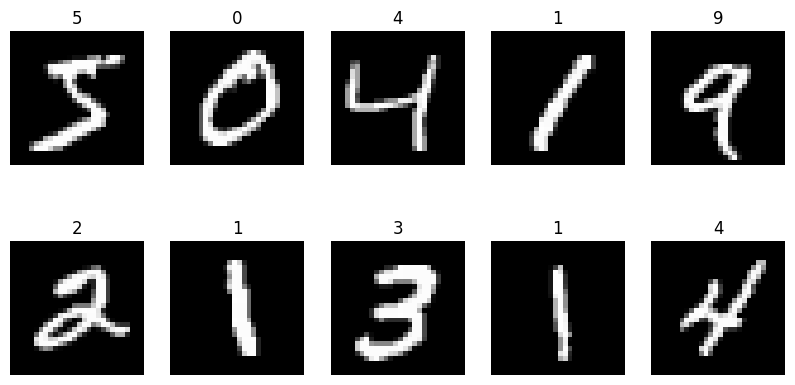

In [19]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(np.argmax(y_train[i]))
    plt.axis('off')
plt.show()

Input: Imagem 28x28 → (28, 28, 1).

Conv2D(32): Gera 32 feature maps de 26x26 (cada filtro 3x3 "desliza" pela imagem).

MaxPooling: Reduz para 13x13.

Conv2D(64): Gera 64 feature maps de 11x11.

MaxPooling: Reduz para 5x5.

Flatten: Transforma 5x5x64 em 1600 valores.

Dense(128): Camada oculta com 128 neurônios.

Dropout: Regularização durante o treino.

Dense(10): Probabilidades para cada classe.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential( 
    [
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ]
)
model.summary()

/home/dede/DataAnalisys/JupyterVenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))   

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7981 - loss: 0.6416 - val_accuracy: 0.9762 - val_loss: 0.0733
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9658 - loss: 0.1165 - val_accuracy: 0.9868 - val_loss: 0.0439
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9756 - loss: 0.0820 - val_accuracy: 0.9894 - val_loss: 0.0314
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9814 - loss: 0.0614 - val_accuracy: 0.9884 - val_loss: 0.0346
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9850 - loss: 0.0509 - val_accuracy: 0.9905 - val_loss: 0.0261
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9860 - loss: 0.0444 - val_accuracy: 0.9895 - val_loss: 0.0290
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9889 - loss: 0.0363 - val_accuracy: 0.9909 - val_loss: 0.0257
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9896 - loss: 0.0332 - 

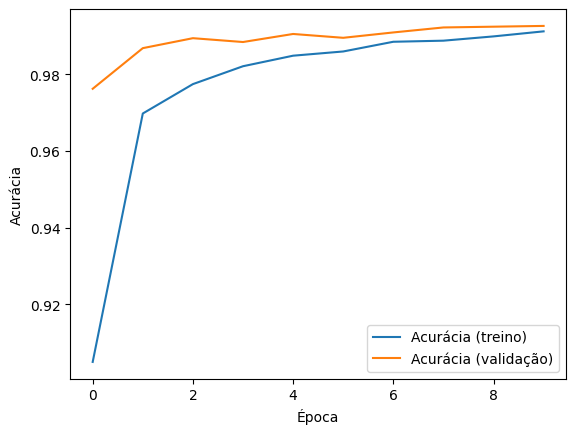

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9907 - loss: 0.0283
Acurácia no teste: 0.9926


In [26]:
plt.plot(history.history['accuracy'], label='Acurácia (treino)')
plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Acurácia no teste: {test_acc:.4f}")

**Exercício:** Modifique a CNN para avaliar a acurácia. Sugestões:
- Adicione mais camadas convolucionais.
- Experimente diferentes valores de Dropout.
- Altere o número de filtros (32 → 64).
- Teste diferentes otimizadores (SGD, RMSprop).

Faça vários experimentos e monte uma tabela com a performance de cada um ao final:
- experimento 1: adicionando mais camadas
- experimento 2: retirando o dropout e mantendo mais camdas
- experimento 3: dropout com diferentes valores e mantendo mais camadas
- experimento 4: alterando o número de filtros, com dropout e mantendo mais camadas
- experimento 5: todos os anteriores e variando o otimizador
- experimento 6: só variando o otimizador